created by Zsolt Elter (2020)

in case any mistakes are found, please let me know.

# 2nd tutorial

Some words on scattering reactions in general. We mostly work with elastic scattering, thus the kinetic energy and the linear momentum stay constant during the collision. 

One can derive that 

$$E_l'=\frac{1}{2}E_l[(1+\alpha)+(1-\alpha)cos\theta]$$

where

$$\alpha=\big(\frac{A-1}{A+1}\big)^2$$

and $A=M/m$

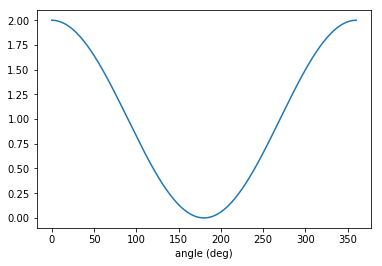

In [3]:
import numpy as np
import matplotlib.pyplot as plt
theta=np.linspace(0,360,361)*np.pi/180
A=1
alpha=((A-1)/(A+1))**2

plt.figure()
plt.plot(theta*180/np.pi,(1+alpha)+(1-alpha)*np.cos(theta))
plt.xlabel('angle (deg)')
plt.show()

Thus $E_l'$ is bound between $\alpha E_l$ (for $\theta=\pm\pi$) and $E_l$ (for $\theta = 0$).

If one assumes isotropic scattering in the COM frame. one can arrive to the pdf

\begin{equation}
    P(E_l \rightarrow E_l') = 
    \begin{cases}
      \frac{1}{E_l(1-\alpha)} & \text{if $\alpha E_l < E_l' < E_l$} \\
      0 & \text{if $0<E_l'<\alpha E_l$}
    \end{cases}
\end{equation}

Also one can see that the energy loss $ E_l-E_l'$ depends on $E_l$, however the ratio $E_l/E_l'$ is independent of energy. Thus it might be interesting to look at ratios (look up the lethargy variable).

The slowing down decrement (or average increase of lethargy per collision):

$$\xi=\int_{\alpha E_l}^{E_l}\ln \Big(\frac{E_l}{E_l'}\Big)P(E_l \rightarrow E_l')dE_l'$$

Thus increase of elastic and isotropic scattering in COM.

$$\xi=1-\frac{(A-1)^2}{2A}\ln\Big(\frac{A+1}{A-1}\Big)=1+\frac{\alpha}{1-\alpha}\ln\alpha$$

## 1st exercise

Calculate the slowing down decrement $\xi$ for natural hydrogen and the minimum number of elastic scattering collisions required to slow a neutron down from 2.2 MeV to 0.1 eV.

The slowing down decrement is easy to see from the previous definition:

$$\xi_H=1$$

Also one can notice that $\alpha=0$, thus the neutron can loose all of its energy in a head-on hit. Which also means that it can slow down to 0.1eV in one collision, the collision angle for that is

$$cos \theta= 2\frac{E_l'}{E_l}-1$$

In [4]:
Ei=2.2
Ef=0.1e-6

theta=np.arccos(2*Ef/Ei-1)

print(theta/np.pi*180)

179.97556899734053


## 2nd exercise Slowing down time

The slowing-down time for neutrons can be calculated by describing the process in terms of a deterministic sequence instead of a stochastic one. It is assumed that the path length $\lambda$ between one collision and the next is always the same. 

   a, On the basis of this model, find an expression giving the average time taken for the energy of a neutron to become $E_f$.



$$\xi = \ln \Big(\frac{E_{n-1}}{E_{n}}\Big)$$

Thus

$$E_{n} = E_{n-1}e^{-\xi}$$ 

and

$$E_{n-1} = E_{n-2}e^{-\xi}$$. 

and

$$E_{n} = E_{n-2}e^{-2\xi}$$

and the general form can be written as:

$$E_{f} = E_{i}e^{-n\xi}$$

The velocity of a non relativistic neutron is $v = \sqrt{\frac{2E}{m}}$, therefore is possible to express the same in terms of the velocity of the neutron before and after the collisions:

$$v_{f} = v_{i}e^{-n\xi/2}$$

The time to travel through one mean free path ($\lambda = \frac{1}{\Sigma} = \frac{1}{\Sigma(E)}$) is changing as the neutron slows (from now on $v_i=v_0$):

$$t_0=\frac{\lambda}{v_0}$$

then

$$t_1=\frac{\lambda}{v_1}=\frac{\lambda}{v_0}e^{\frac{\xi}{2}}$$

and

$$t_2=\frac{\lambda}{v_2}=\frac{\lambda}{v_0}e^{\frac{2\xi}{2}}$$

up to after the $n$th collision

$$t_n=\frac{\lambda}{v_n}=\frac{\lambda}{v_0}e^{\frac{n\xi}{2}}$$

and the average time to slow down from $v_i$ to $v_f$

$$T=t_0+t_1+t_2+...=\sum\limits_{n=0}^{N}\frac{\lambda}{v_0}e^{\frac{n\xi}{2}}=\sum\limits_{n=0}^{N}\frac{\lambda}{v_0}\Big(e^{\frac{\xi}{2}}\Big)^n=\frac{\lambda}{v_0}\frac{1-e^{\frac{(N+1)\xi}{2}}}{1-e^{\frac{\xi}{2}}}$$

remember $\sum\limits_{n=0}^{N}ar^n=a\frac{1-r^{N+1}}{1-r}$



## 3rd exercise

- Estimate the average number of collisions required to reduce fast fission neutrons of initial energy 2 MeV to thermal energy (0.025 eV) in graphite moderator;
- Calculate the corresponding slowing-down time given that $\Sigma_s$ = 0.385 cm$^{-1}$.

The average number of collisions comes from

$$n=\frac{1}{\xi}\ln\frac{E_i}{E_f}$$

remember in case of heads-on, it would be

$$n=\frac{1}{\ln\alpha}\ln\frac{E_f}{E_i}$$

In [5]:
Ei=2.0 #MeV
Ef=0.025e-6 #MeV
A=12
alpha=((A-1)/(A+1))**2
xi=1+alpha/(1-alpha)*np.log(alpha)

nave=np.log(Ei/Ef)/xi
nheads=np.log(Ef/Ei)/np.log(alpha)
print(xi)
print(nave)
print(nheads)

0.15776898982320375
115.34292773903384
54.46600491490566


For the slowing down time

$$T=\frac{\lambda}{v_0}\frac{1-e^{\frac{(N+1)\xi}{2}}}{1-e^{\frac{\xi}{2}}}$$


In [7]:
Sig=0.385
lam=1/Sig/100 #m
eV_to_J=1.60217662e-19
E0=2*1e6*eV_to_J #ev to J
m=1.675E-27 #kg
v0=np.sqrt(2*E0/m) #m/s
print(v0)
N=nave
T=(lam/v0)*((1-np.exp((N+1)*xi/2))/(1-np.exp(xi/2)))
print(T)

19560402.401012927
0.00015656219687178042


If we wouldn't know how to solve geometric series, we still could have programmed our way out by calculating the expected energy after each collision.

115
0.00015238326692508254


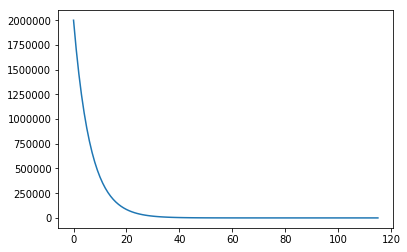

In [15]:
eV_to_J=1.60217662e-19
m=1.675E-27 #kg
E=2.0e6
t=0
N=0
Es=[]
while E>0.025:
    v=np.sqrt(2*E*eV_to_J/m) #m/s
    t=t+lam/v
    Es.append(E)
    E=E*np.exp(-xi)
    N=N+1
print(N-1)
print(t)
plt.figure()
plt.plot(Es)
plt.show()

## 4th exercise

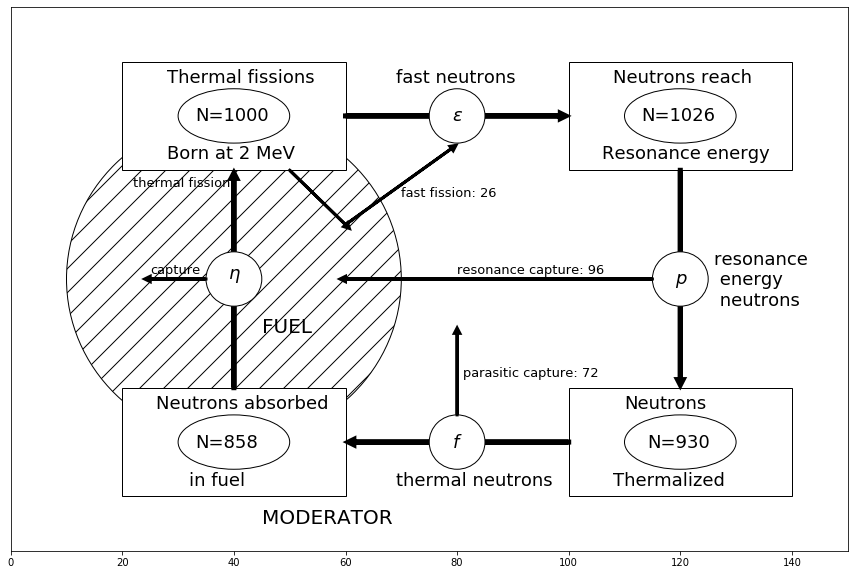

In [188]:
import matplotlib.pyplot as plt
import matplotlib.patches as p
fig, ax = plt.subplots(figsize=(15,10))

fuel = plt.Circle((40, 0), 30,facecolor='white',edgecolor='black',hatch='/')
ax.add_artist(fuel)
thFiss1 = plt.Rectangle((20,20), 40, 20,facecolor='white',edgecolor='black')
thFiss2 = p.Ellipse((40,30), 20, 10,facecolor='white',edgecolor='black')
resEsc1 = plt.Rectangle((100,20), 40, 20,facecolor='white',edgecolor='black')
resEsc2 = p.Ellipse((120,30), 20, 10,facecolor='white',edgecolor='black')
thermalized1 = plt.Rectangle((100,-40), 40, 20,facecolor='white',edgecolor='black')
thermalized2 = p.Ellipse((120,-30), 20, 10,facecolor='white',edgecolor='black')
absorbed1 = plt.Rectangle((20,-40), 40, 20,facecolor='white',edgecolor='black')
absorbed2 = p.Ellipse((40,-30), 20, 10,facecolor='white',edgecolor='black')
ax.add_artist(thFiss1)
ax.add_artist(thFiss2)
ax.add_artist(absorbed1)
ax.add_artist(absorbed2)
ax.add_artist(resEsc1)
ax.add_artist(resEsc2)
ax.add_artist(thermalized1)
ax.add_artist(thermalized2)
plt.arrow(60, 30, 38.5, 0,linewidth=5,head_width=1, head_length=1,color='black')
plt.arrow(120, 20, 0, -38.5,linewidth=5,head_width=1, head_length=1,color='black')
plt.arrow(100, -30, -38.5, 0,linewidth=5,head_width=1, head_length=1,color='black')
plt.arrow(40, -20, 0, 38.5,linewidth=5,head_width=1, head_length=1,color='black')
c1=plt.Circle((80,30),5,facecolor='white',edgecolor='black')
c2=plt.Circle((120,0),5,facecolor='white',edgecolor='black')
c3=plt.Circle((80,-30),5,facecolor='white',edgecolor='black')
c4=plt.Circle((40,0),5,facecolor='white',edgecolor='black')
ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)
ax.add_artist(c4)
plt.text(39,0,r'$\eta$',fontsize=18)
plt.text(79,29,r'$\epsilon$',fontsize=18)
plt.text(69,36,'fast neutrons',fontsize=18)
#################
plt.arrow(50,20,10,-10,linewidth=3,head_width=1, head_length=1,color='black')
plt.arrow(60,10,19,14,linewidth=3,head_width=1, head_length=1,color='black')
plt.text(70,15,'fast fission: 26',fontsize=13)
plt.arrow(80,-25,0,15,linewidth=3,head_width=1, head_length=1,color='black')
plt.text(81,-18,'parasitic capture: 72',fontsize=13)
plt.arrow(35,0,-10,0,linewidth=3,head_width=1, head_length=1,color='black')
plt.text(25,1,'capture',fontsize=13)
plt.text(22,17,'thermal fission',fontsize=13)
##########
plt.text(119,-1,r'$p$',fontsize=18)
plt.text(126,-5,'resonance \n energy \n neutrons',fontsize=18)
plt.arrow(115, 0, -55, 0,linewidth=3,head_width=1, head_length=1,color='black')
plt.text(80,1,'resonance capture: 96',fontsize=13)

plt.text(79,-31,r'$f$',fontsize=18)
plt.text(69,-38,'thermal neutrons',fontsize=18)

plt.text(33,29,'N=1000',fontsize=18)
plt.text(28,36,'Thermal fissions',fontsize=18)
plt.text(28,22,'Born at 2 MeV',fontsize=18)

plt.text(33+80,29,'N=1026',fontsize=18)
plt.text(28+80,36,'Neutrons reach',fontsize=18)
plt.text(26+80,22,'Resonance energy',fontsize=18)

plt.text(34+80,29-60,'N=930',fontsize=18)
plt.text(30+80,36-60,'Neutrons',fontsize=18)
plt.text(28+80,22-60,'Thermalized',fontsize=18)

plt.text(33,29-60,'N=858',fontsize=18)
plt.text(26,36-60,'Neutrons absorbed',fontsize=18)
plt.text(32,22-60,'in fuel',fontsize=18)

plt.text(45,-10,'FUEL', fontsize=20)
plt.text(45,-45,'MODERATOR', fontsize=20)
#ax.add_artist(polygon)
plt.xlim(0,150)
plt.ylim(-50,50)
#plt.xticks([-200,0,200], ('-a/2',0,'a/2'))
ax.yaxis.set_visible(False) # Hide only x axis
plt.show()

**Fast fission factor**: ratio between the numberr of fission neutrons induced by both thermal and fast neutrons and the number of fission neutrons induced by thermal neutrons only

$$\epsilon=\frac{\int_{V_{f}} \int_0^\infty \nu(E)\Sigma_f(r,E)\phi(r,E)dVdE}{\int_{V_{f}} \int_0^{\sim 5kT} \nu(E)\Sigma_f(r,E)\phi(r,E)dVdE}$$

In the current case fission neutrons have enough energy to induce fast fission in U-238 (threshold is around 1.2MeV).

$$\epsilon = 1026/26=1.026$$

**Resonance escape probability**: probaility for fast neutrons to slow-down to thermal energies without being absorbed in the resonance region of absorbers

$$p=1-\frac{\int_{V_{f}} \int_{\sim 5kT}^\infty \Sigma_a(r,E)\phi(r,E)dVdE}{\int_{V_{f}} \int_0^{\infty} \nu(E)\Sigma_f(r,E)\phi(r,E)dVdE}$$

In the current case the neutrons slow to resonance energies and some of them are scattered to fuel regions, if a neutron at this energy enters fuel will be almost certainly captured. 

$$p=\frac{930}{1026}=1-\frac{96}{1026}=0.906$$

**Thermal utilization factor**: the ratio of the number of thermal neutrons absorbed in the fuel and the number of thermal neutrons absorbed in all materials

$$f=\frac{\int_{V_{f}} \int_0^{\sim 5kT} \Sigma_a(r,E)\phi(r,E)dVdE}{\int_{V_{t}} \int_0^{\sim 5kT} \Sigma_a(r,E)\phi(r,E)dVdE}$$

In the current case some neutrons will be absorbed by the moderator (or other non-fuel material), this is parasitic capture.

$$f=858/930=0.923$$

**Thermal fission factor**: the average number of fission neutrons emitted per thermal neutron absorbed in the fuel

$$\eta=\frac{\int_{V_{f}} \int_0^{\sim 5kT} \nu(E)\Sigma_f(r,E)\phi(r,E)dVdE}{\int_{V_{f}} \int_0^{\sim 5kT} \Sigma_a(r,E)\phi(r,E)dVdE}$$

In the current case the number of thermal neutrons absorbed in the fuel is $fp\epsilon N_0$.. Some of these will cause fission (and return neutrons) and some of them will be captured. 

$$\eta=1000/858=1.66$$

Thus 

$$k_{\infty}=\eta f p \epsilon=1.0$$

which is not surprising since the ratio between the number of neutrons in the consecutive cycles is 1.0.


In [142]:
eps=1026/1000
p=930/1026
f=858/930
eta=1000/858
kinf=eta*f*p*eps
print(kinf)

1.0000000000000002


## 5th exercise: thermal utilization factor

Calculate the thermal utilization factor for a heterogeneous lattice made up of
cylindrical uranium rods of diameter 3 cm and pitch 18 cm placed in graphite. Take the flux ratio $\phi_M/\phi_U$ as 1.6.

Densities: Uranium 18700 kg m$^{-3}$, Graphite = 1620 kg m$^{-3}$. \\

Absorption cross-sections $\sigma_{a,U}$=7.68 b; $\sigma_{a,M}$ = 4.5 $\cdot$ 10$^{-3}$ b.

The absorption rate in the fuel is

$$\Sigma_{a,U}\phi_U V_U$$

and the absorption rate in the moderator is

$$\Sigma_{a,M}\phi_M V_M$$

where $V_M$ and $V_U$ are the volumes. We do not know the height, but as we will see only the volume ratio will matter:

$$\frac{V_M}{V_U}=\frac{A_Mh}{A_Uh}=\frac{p^2-r^2\pi}{r^2\pi}$$

where $A_U$ and $A_M$ are the cross sectional areas, $r$ is the fuel radius and $p$ is the pitch of the cell


The fraction of thermal neutrons absorbed by the Uranium fuel as compared to the total number of thermal neutron absorptions in the assembly is known as the thermal utilization factor $f$ and is given by


$$f = \frac{\Sigma_{a,U}\phi_U V_U}{\Sigma_{a,U}\phi_U V_U + \Sigma_{a,M}\phi_M V_M }    = \frac{1}{1 + \frac{\Sigma_{a,M}\phi_M V_M }{\Sigma_{a,U}\phi_U V_U}} $$


In [135]:
r=3/2 #cm
p=18 #cm
sig_a_U=7.68 #b
sig_a_M=4.5e-3
flux_MpU=1.6
rho_U=18.7 #g/cm3
rho_M=1.62 #g/cm3

M_U=238 #approx, we dont know enrichment
M_C=12

NA=6.022e23


N_U=NA*rho_U/M_U #approximate...
N_M=NA*rho_M/M_C #/cm3

Sig_a_U = N_U*sig_a_U
Sig_a_M = N_M*sig_a_M
Sig_MpU=Sig_a_M/Sig_a_U

A_U=r**2*np.pi
A_M=p**2-A_U
V_MpU=A_M/A_U

f=1/(1+Sig_MpU*flux_MpU*V_MpU)

print(f)



0.9326421327798471
